Text(0.5, 1.0, 'vega vs vol')

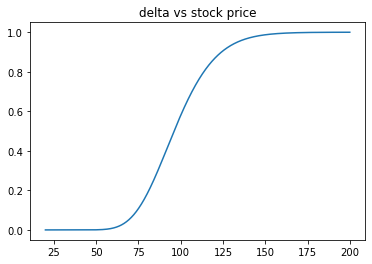

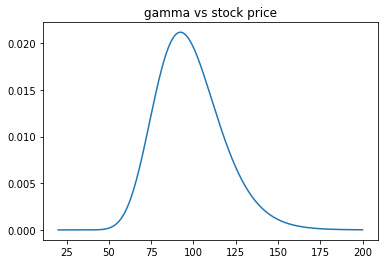

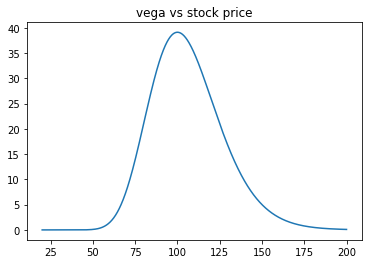

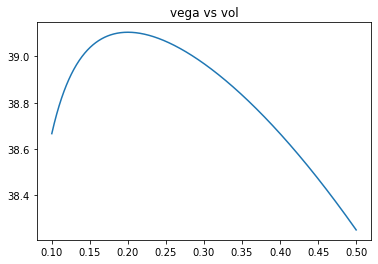

In [58]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

def normcdf(x):
    #'Cumulative distribution function for the standard normal distribution'
    return (1.0 + erf(x / sqrt(2.0))) / 2.0

def normpdf(x):
    return 1/sqrt(2*pi) * exp(- x**2/2)

def d_plus(r, sigma, T, s, K):
    return ((r + 1/2 * sigma**2) * T - log(K/s))/ (sigma * sqrt(T) )

def d_minus(r, sigma, T, s, K):
    return ((r - 1/2 * sigma**2) * T - log(K/s))/ (sigma * sqrt(T) )

def delta(r, sigma, T, s, K):
    return normcdf(d_plus(r, sigma, T, s, K))

def gamma(r, sigma, T, s, K):
    return normpdf(d_plus(r, sigma, T, s, K))/(sigma*sqrt(T)*s)

def vega(r, sigma, T, s, K):
    return K*exp(-r*T)*normpdf(d_minus(r, sigma, T, s, K))*sqrt(T) # theoretical formula for vega from Wikipedia

def theta(r, sigma, T, s, K):
    return -s*normpdf(d_plus(r, sigma, T, s, K))*sigma/(2*sqrt(T)) -r*K*exp(-r*T)*normcdf(d_minus(r, sigma, T, s, K))

n = 1000
T = 1
s = 100
sigma = 0.2
r = 0.02
K = 100

S = np.linspace(20, 200, num = n)
Sigma = np.linspace(0.1,0.5, num =n)

vega_call_1 = np.zeros(n)
vega_call_2 = np.zeros(n)
delta_call = np.zeros(n)
gamma_call = np.zeros(n)

for i in range(n):
    delta_call[i] = delta(r, sigma, T, S[i], K)

for i in range(n):
    gamma_call[i] = gamma(r, sigma, T, S[i], K)
    
for i in range(n):
    vega_call_1[i] = vega(r, sigma, T, S[i], K) # Vega at different stock prices

for i in range(n):
    vega_call_2[i] = vega(r, Sigma[i], T, s, K) # At the money call option vega at different vols
    

p1 = plt.figure(1)
plt.plot(S, delta_call)
plt.title('delta vs stock price')
    
p2 = plt.figure(2)
plt.plot(S, gamma_call)
plt.title('gamma vs stock price')
    
p3 = plt.figure(3)
plt.plot(S, vega_call_1)
plt.title('vega vs stock price')

p4 = plt.figure(4)
plt.plot(Sigma, vega_call_2)
plt.title('vega vs vol')


In [61]:
T = 1
s = 100
sigma = 0.3
r = 0.02
K = 100

def callBS(r, sigma, T, s, K):
    return s * normcdf(d_plus(r, sigma, T, s, K)) - K * exp(-r*T) * normcdf(d_minus(r, sigma, T, s, K))

delta_call = delta(r, sigma, T, s, K)
gamma_call = gamma(r, sigma, T, s, K)
theta_call = theta(r, sigma, T, s, K)
v_call = callBS(r, sigma, T, s, K)

BS_PDE = -r*v_call + theta_call + delta_call*r*s + 1/2*gamma_call*sigma**2*s**2
print("Verifying Black-Scholes PDE: ", BS_PDE)

Verifying Black-Scholes PDE:  0.0
